# 机器学习之模型评估、选择与验证

#### 【简介】

**机器学习**的目的是使学到的模型不仅对已知数据而且对未知数据都能有很好的预测能力。不同的学习方法会训练出不同的模型，不同的模型可能会对未知数据作出不同的预测，然而我们手上并没有“未知”的数据。所以，如何评价模型好坏，并选择出好的模型是每个机器学习工程师需要掌握的内容。

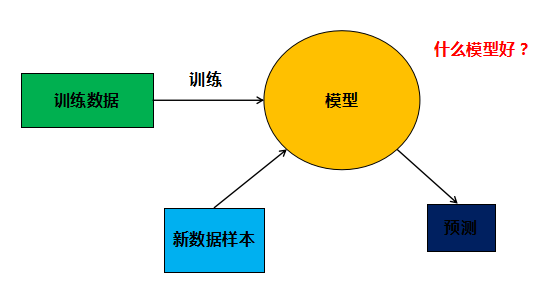

#### 【目录】

1. [训练集与测试集](#1.-训练集与测试集)
2. [欠拟合与过拟合](#2.-欠拟合与过拟合)
3. [偏差与方差](#3.-偏差与方差)
4. [验证集与交叉验证](#4.-验证集与交叉验证)
5. [衡量回归的性能指标](#5.-衡量回归的性能指标)
6. [准确度的陷阱与混淆矩阵](#6.-准确度的陷阱与混淆矩阵)
7. [精准率与召回率](#7.-精准率与召回率)
8. [F1 Score](#8.-F1-Score)
9. [ROC曲线与AUC](#9.-ROC曲线与AUC)
10. [sklearn中的分类性能指标](#10.-sklearn中的分类性能指标)

## 1. 训练集与测试集

### 为何需要训练集和测试集

我们想要利用收集的西瓜数据构建一个机器学习模型，用来预测新的西瓜的好坏，但在将模型用于新的测量数据之前，我们需要知道模型是否有效，也就是说，我们是否应该相信它的预测结果。不幸的是，我们不能将用于构建模型的数据用于评估模型的性能。因为我们的模型会一直**记住**整个训练集，所以，对于训练集中的任何数据点总会预测成正确的标签。这种记忆无法告诉我们模型的泛化能力如何，即预测新样本的能力如何。我们要用新数据来评估模型的性能。**新数据**是指模型之前**没见过**的数据，而我们有这些新数据的标签。通常的做法是，我们把手头上的数据分为两部分，**训练集**与**测试集**。**训练集**用来**构建**机器学习模型，**测试集**用来**评估**模型性能。

### 如何划分训练集与测试集

通常我们将手头数据的`70%`或`80%`用来训练数据，剩下的`%30%`或`20%`作为测试用来评估模型性能。值得注意的是，在**划分**数据集**之前**，我们要先把手头上的数据的**顺序打乱**，因为我们搜集数据时，数据可能是按照标签排放的。比如，现在有100个西瓜的数据，前50个是好瓜，后50个是坏瓜，如果将后面的30个西瓜数据当做测试集，这时测试集中只有坏瓜一个类别，这无法告诉我们模型的泛化能力如何，所以我们将数据打乱，确保测试集中包含所有类别的数据。

## 2. 欠拟合与过拟合

### 欠拟合及其原因

- **欠拟合**：模型在**训练集上误差很高**
- **欠拟合原因**：模型**过于简单**，没有很好的捕捉到数据特征，不能很好的拟合数据

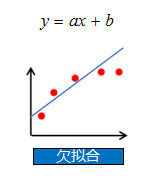

如上面例子，我们的数据是一份非线性数据，如果你想要用线性回归来拟合这份数据，由于数据是非线性的，模型是线性，则过于简单。所以，无论模型怎么训练，最终都不能很好的拟合数据。

### 过拟合及其原因

- **过拟合**：在**训练集上误差低**，**测试集上误差高**
- **过拟合原因**：模型把数据学习的太彻底，以至于把**噪声**数据的特征也**学习**到了，这样就会导致在后期测试的时候不能够很好地识别数据，模型**泛化能力**太**差**

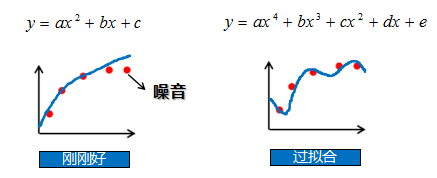

如上面例子，在训练集上，模型为了拟合数据，添加了更多的多次项，使模型过于复杂，对噪音数据也能很好的拟合，所以在训练集上正确率很高，而在测试集上没有这些噪音数据，所以正确率很低。

在分类的问题中，如下例子：

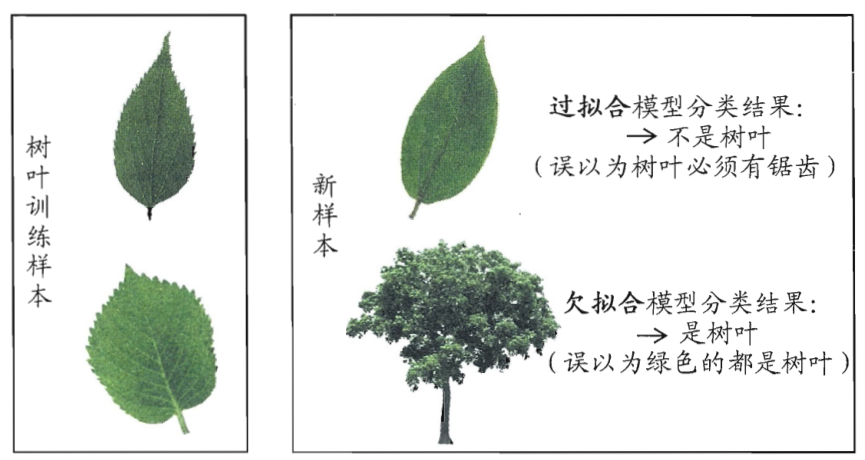

欠拟合：由于模型过于简单，只学习到绿色这个特征，只要是绿色就都判断为树叶，结果将树当做了树叶。

过拟合：模型过于复杂，将锯齿这个普通特征，看的过于重要，认为必须有锯齿才是树叶，结果将树叶误判为不是树叶。

## 3. 偏差与方差

### 模型误差来源

我们知道，欠拟合是模型在训练集上误差过高，过拟合模型是在训练集上误差低，在测试集上误差高。那么模型误差的来源是什么呢？

其实，模型在**训练集上的误差**来源主要来自于**偏差**，在**测试集上误差**来源主要来自于**方差**。

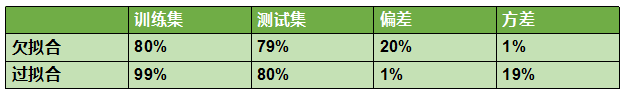

上图表示，如果一个模型在训练集上正确率为80%，测试集上正确率为79% ，则模型欠拟合，其中20%的误差来自于偏差，1%的误差来自于方差。如果一个模型在训练集上正确率为99%，测试集上正确率为80% ，则模型过拟合，其中1%的误差来自于偏差，19%的误差来自于方差。

可以看出，**欠拟合**是一种**高偏差**的情况。**过拟合**是一种**低偏差**，**高方差**的情况。

#### 偏差与方差

- **偏差**：预计值的**期望**与**真实值**之间的**差距**

- **方差**：预测值的**离散程度**，也就是**离其期望值的距离**。

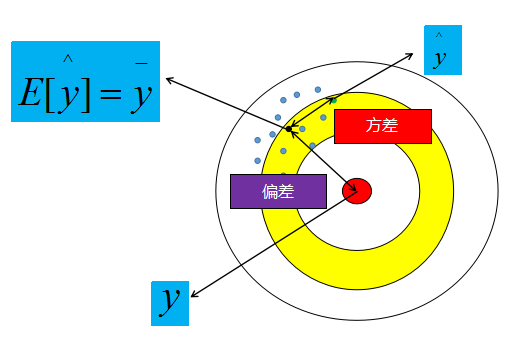

以射击打靶为例，蓝色的小点是我们在靶子上的射击记录，这些蓝色点的**质心**（黑色点）到**靶心的距离**为**偏差**，**某个点**到**质心**的距离为**方差**。所以，某个点到质心的误差就是由偏差与方差所组成。那么，为什么欠拟合是一直高偏差情况，过拟合是一种低偏差高方差情况呢？

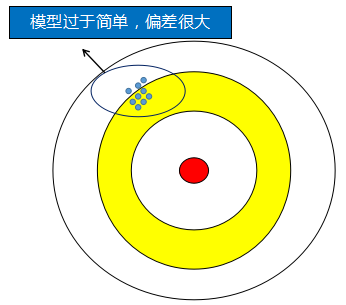

我们知道，欠拟合是因为模型过于简单，模型过于简单我们可以当做是我们射击时射击的范围比较小，它所涵盖的范围不包括靶心，所以无论怎么射击，射击点的质心里靶心的距离都很远，所以偏差很高。但是因为射击范围很小，所以所有射击点相互离的比较紧密，则方差低。（比如我们的学习成绩比较稳定，但考试成绩不好，一直停在及格线上）

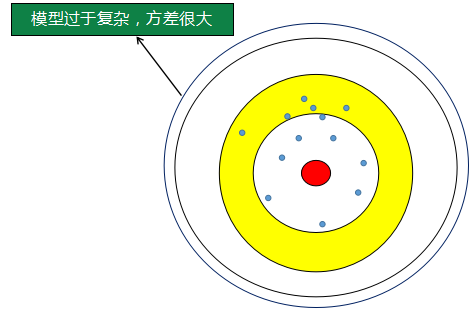

而过拟合是因为模型过于复杂，我们可以理解为这个时候射击的范围很大了，经过不断的训练射击的点的质心离靶心的距离很近了，但是由于数据量有限，而射击范围很大，所以所有射击点之间非常离散，也就是方差很大。（稳定性差）

## 4. 验证集与交叉验证

### 为什么需要验证集

在机器学习中，通常需要评估若⼲候选模型的表现并从中选择模型。这⼀过程称为**模型选择**。可供选择的候选模型可以是有着不同超参数的同类模型。以神经网络为例，我们可以选择隐藏层的个数，学习率大小和激活函数。为了得到有效的模型，我们通常要在模型选择上下⼀番功夫。从严格意义上讲，测试集只能在所有超参数和模型参数选定后使⽤⼀次。**不可以使⽤测试数据选择模型**，如调参。由于⽆法从训练误差估计泛化误差，因此也**不应只依赖训练数据选择模型**。鉴于此，我们可以预留⼀部分在训练数据集和测试数据集以外的数据来进⾏**模型选择**。这部分数据被称为**验证数据集**，简称验证集。

为了方便大家理解，举一个生活中的案例进行类比，我们一般是通过考试衡量学生的学习情况。老师上完课后，给学生布置的作业相当于训练数据集，中期的测试题相当于验证集，期末考试题相当于测试数据集。为了更加客观的衡量学生学习情况，期末考试题的内容不应该出现在平常的作业题和中期的测试题中，因为之前做过的题，对于计算机而言，相当于已经记住了，如果再次做同样的题，准确率就会很高。同样的道理，平常的作业题也不应该出现在中期的测试题里。中期的测试题，是为了掌握学生的学习情况，了解自己哪些方面内容没掌握，从而调整下一步学习的方向，为期末考试做好准备。

### k折交叉验证

由于**验证数据集不参与模型训练**，当训练数据不够⽤时，预留⼤量的验证数据显得太奢侈。⼀种改善的⽅法是**K折交叉验证**。在K折交叉验证中，我们把原始训练数据集**分割成K个不重合的⼦数据集**，然后我们做**K次模型训练和验证**。每⼀次，我们使⽤⼀个⼦数据集验证模型，并使⽤其它K−1个⼦数据集来训练模型。在这K次训练和验证中，每次⽤来验证模型的⼦数据集都不同。最后，我们对这**K 次训练误差和验证误差分别求平均**。

k的值由我们自己来指定，如以下为5折交叉验证。

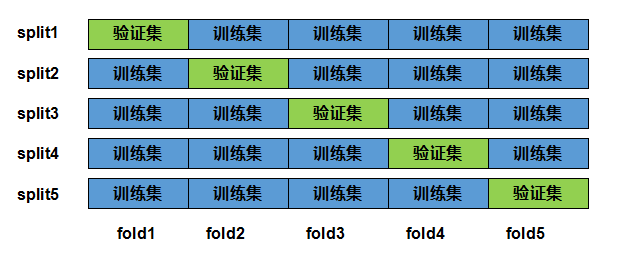

还是以考试为例，解释上图内容。交叉验证，相当于把平常的作业题和中期的测试题合并成一个题库，然后等分成几份。图中所示，将题库分成了五份，第一行的意思是，先让学生做后面的四份训练题，再用第一份题进行测试。以此类推，再重复四次，每一次相当于重新进行学习。最后，取五次的平均成绩，平均成绩高，说明老师的教学方法好，对应到模型，就是超参数更好。

### 集成学习

在机器学习的**有监督学习**算法中，我们的目标是学习出一个**稳定**的且在各个方面表现都较好的模型，但实际情况往往不这么理想，有时我们只能得到多个有偏好的模型（弱监督模型，在某些方面表现的比较好）。**集成学习**就是**组合这里的多个弱监督模型**以期得到一个**更好更全面的强监督模型**（三个臭皮匠，顶个诸葛亮）。集成学习潜在的**思想**是即便某一个弱分类器得到了错误的预测，其他的弱分类器也可以将错误纠正回来。集成方法是**将几种机器学习技术组合成一个预测模型**的**元算法**，以达到**减小方差、偏差或改进预测**的效果。

### 自助法

在统计学中，**自助法**是一种从给定训练集中**有放回的均匀抽样**，也就是说，每当选中一个样本，它等可能地被再次选中并被再次添加到训练集中。自助法以自助采样法为基础，给定包含$m$个样本的数据集$D$，我们对它进行采样产生数据集$D'$；每次随机从$D$中挑选一个样本，将其拷贝放入 $D'$，然后再将该样本**放回**初始数据集$D$中，使得该样本在下次采样时仍有可能被采到；这个过程重复执行$m$次后，就得到了包含$m$个样本的数据集$D'$，这就是**自助采样**的结果。**自助法**在**数据集较小**、难以有效划分训练/测试集时很有用；此外，自助法能从初始数据集中产生多个不同的训练集，这对集成学习等方法有很大的好处。然而，自助法产生的数据集**改变**了初始数据集的**分布**，这会**引入估计偏差**。

## 5. 衡量回归的性能指标

### 前言

大家知道已经，机器学习通常都是将训练集上的数据对模型进行训练，然后再将测试集上的数据给训练好的模型进行预测，最后根据模型性能的好坏选择模型，对于分类问题，大家很容易想到，可以使用正确率来评估模型的性能，那么回归问题可以使用哪些指标用来评估呢？

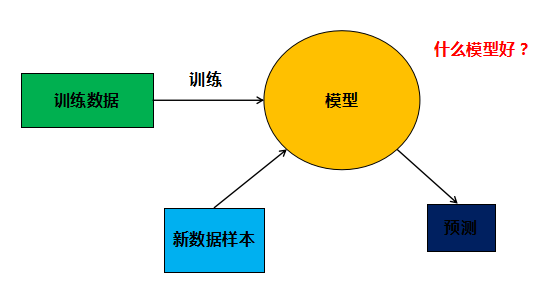

### MSE

即MSE （Mean Squared Error）叫做**均方误差**, 公式如下：

$$
 mse = \frac{1}{m} \sum_{i=1}^m(y^i - p^i)^2
$$

其中$y^i$表示第$i$个样本的真实标签，$p^i$表示模型对第$i$个样本的预测标签。MSE可作为回归模型的损失函数。

### RMSE

即RMSE（Root Mean Squard Error）**均方根误差**，公式如下：

$$
rmse = \sqrt{\frac{1}{m} \sum_{i=1}^m(y^i - p^i)^2}
$$ 

RMSE其实就是MSE开个根号。有什么意义呢？其实实质是一样的。只不过用于更好地描述数据。RMSE也可以作为模型的损失函数。

例如：要做房价预测，每平方是万元，我们预测结果也是万元。那么差值的平方单位应该是千万级别的。那我们不太好描述自己做的模型效果。怎么说呢？我们的模型误差是多少千万？于是干脆就开个根号就好了。我们误差的结果就跟我们数据是一个级别的了，在描述模型的时候就说，我们模型的误差是多少万元。

### MAE

即MAE （Mean Absolute Error）**平均绝对误差**，公式如下：

$$
mae = \frac{1}{m} \sum_{i=1}^m|y^i - p^i|
$$

MAE 不能作为损失函数，但的确是一个非常直观的评估指标，它表示每个样本的预测标签值与真实标签值的 L1 距离。

### R-Squared

上面的几种衡量标准针对不同的模型会有不同的值。比如说预测房价 那么误差单位就是万元。数子可能是3，4 ，5之类的。那么预测身高就可能是 0.1，0.6 之类的。但这些数值没有什么可读性，到底多少才算好呢？就要根据模型的应用场景来看。 通常分类算法的衡量标准就是正确率，而正确率又在0～1之间，最高百分之百。最低0 。如果是负数，则考虑非线性相关，很直观，而且不同模型一样的。那么线性回归有没有这样的衡量标准呢？

R-Squared 就是这么一个指标，公式如下：

$$
R^2 = 1 - \frac{\sum_i(p^i - y^i)^2}{\sum_i(y_{mean}^i - y^i)^2}
$$

其中$y_{mean}$表示所有测试样本标签值的均值。为什么这个指标会有刚刚我们提到的性能呢？我们分析下公式：

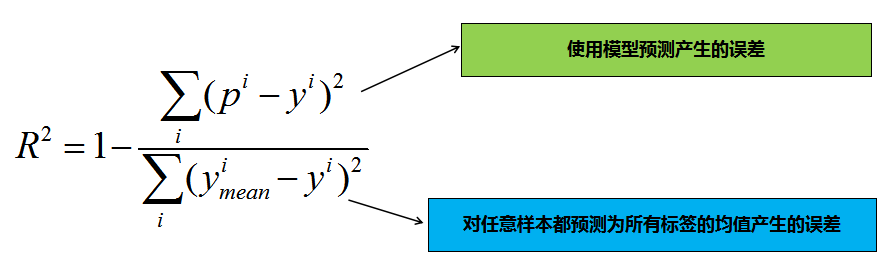

其实**分子**表示的是模型**预测**时产生的**误差**，**分母**表示的是对任意样本都预测为所有标签**均值**时产生的**误差**，由此可知：

1. $R^2 \leq 1$，当我们的模型不犯任何错误时，取最大值1
2. 当我们的模型性能跟**基模型**性能相同时，取0
3. 如果为负数，则说明我们训练出来的模型还不如基准模型，此时，很有可能我们的数据不存在任何线性关系

## 6. 准确度的陷阱与混淆矩阵

### 任务描述

填写 python 代码，完成confusion_matrix函数实现二分类混淆矩阵的构建。

### 相关知识

为了完成本任务，需要掌握：

- 准确度的缺陷
- 混淆矩阵

#### 准确度的缺陷

准确度也就是正确率。例如模型的预测结果与数据真实结果如下表所示：

| 编号 | 预测结果 | 真实结果 |
|:-- |:-- |:-- |
| 1 | 1 | 2 |
| 2 | 2 | 2 |
| 3 | 3 | 3 |
| 4 | 1 | 1 |
| 5 | 2 | 3 |

很明显，该模型的准确度为3/5。

那么准确度越高就能说明模型的分类性能越好吗？非也！举个例子，现在我开发了一套癌症检测系统，只要输入你的一些基本健康信息，就能预测出你现在是否患有癌症，并且分类的准确度为0.999。您认为这样的系统的预测性能好不好呢？

您可能会觉得，哇，这么高的准确度！这个系统肯定很牛逼！但是我们知道，一般年轻人患癌症的概率非常低，假设患癌症的概率为0.001，那么其实我这个癌症检测系统只要一直输出您没有患癌症，准确度也可能能够达到0.999。

假如现在有一个人本身已经患有癌症，但是他自己不知道自己患有癌症。这个时候用我的癌症检测系统检测发现他没有得癌症，那很显然我这个系统已经把他给坑了（耽误了治疗）。

看到这里您应该已经体会到了，一个分类模型如果光看准确度是不够的，尤其是对这种样本极度不平衡的情况（10000条健康信息数据中，只有1条的类别是患有癌症，其他的类别都是健康）。

#### 混淆矩阵

想进一步的考量分类模型的性能如何，可以使用其他的一些性能指标，例如精准率和召回率。但这些指标计算的基础是混淆矩阵。

继续以癌症检测系统为例，癌症检测系统的输出不是有癌症就是健康，这里为了方便，就用1表示患有癌症，0表示健康。假设现在拿10000条数据来进行测试，其中有9978条数据的真实类别是0，系统预测的类别也是0，有2条数据的真实类别是1却预测成了0，有12条数据的真实类别是0但预测成了1，有 8条数据的真实类别是1，预测结果也是1。

如果我们把这些结果组成如下矩阵，则该矩阵就成为**混淆矩阵**。

|真实/预测| 0 | 1 |
|:-- |:-- |:-- |
| 0 | 9978 | 12 |
| 1 | 2 | 8 |

混淆矩阵中每个格子所代表的的意义也很明显，意义如下：

| 真实/预测 | 0 | 1 |
|:-- |:-- |:-- |
| 0 | 预测0正确的数量 | 预测1错误的数量 |
| 1 | 预测0错误的数量 | 预测1正确的数量 |

如果将正确看成是**True**，错误看成是**False**， **0**看成是**Negtive**， **1**看成是**Positive**。然后将上表中的文字替换掉，混淆矩阵如下：

| 真实/预测 | 0 | 1 |
|:-- |:-- |:-- |
| 0 | TN | FP |
| 1 | FN | TP |

因此 TN表示真实类别是Negtive，预测结果也是Negtive 的数量； FP表示真实类别是 Negtive，预测结果是Positive 的数量； FN表示真实类别是Positive，预测结果是Negtive 的数量；TP表示真实类别是Positive，预测结果也是Positive的数量。

很明显，当FN和FP都等于0时，模型的性能应该是最好的，因为模型并没有在预测的时候犯错误。即如下混淆矩阵：

|真实/预测| 0 | 1 |
|:-- |:-- |:-- |
| 0 | 9978 | 0 |
| 1 | 0 | 22 |

所以模型**分类性能越好**，混淆矩阵中**非对角线上的数值越小**。

代码示例：

In [1]:
def confusion_matrix(y_true, y_predict):
    def TN(y_true, y_predict):
        return np.sum((y_true == 0) & (y_predict == 0))
    def FP(y_true, y_predict):
        return np.sum((y_true == 0) & (y_predict == 1))
    def FN(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 0))
    def TP(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 1))
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

### 实操练习

#### 编程要求

根据提示，在`Begin-End`区域填写`python`代码，完成`confusion_matrix`函数实现二分类混淆矩阵的构建。

`confusion_matrix`函数中的参数：

- `y_true`：数据的真实类别，类型为`ndarray`
- `y_pred`：模型预测的类别，类型为`ndarray`

#### 测试说明

测试输入：
```
{
    'y_true':[1, 0, 0, 1, 0, 1, 0], 
    'y_pred':[0, 1, 0, 1, 0, 1, 0]
}
```

预期输出：
```
[[3 1]
[1 2]]
```

In [2]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    '''
    构建二分类的混淆矩阵，并将其返回
    :param y_true: 真实类别，类型为ndarray
    :param y_pred: 预测类别，类型为ndarray
    :return: shape为(2, 2)的ndarray
    '''
    #********* Begin *********#
    def TN(y_true, y_predict):
        return np.sum((y_true == 0) & (y_predict == 0))
    def FP(y_true, y_predict):
        return np.sum((y_true == 0) & (y_predict == 1))
    def FN(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 0))
    def TP(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 1))
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

In [6]:
# 测试代码
input_data = {
    'y_true': [1, 0, 0, 1, 0, 1, 0],
    'y_pred': [0, 1, 0, 1, 0, 1, 0]
}

cm = confusion_matrix(np.array(input_data['y_true']), 
                 np.array(input_data['y_pred']))
print(cm)

[[3 1]
 [1 2]]


## 7. 精准率与召回率

### 任务描述

填写python代码，完成`precision_score`函数和`recall_score`函数分别实现计算**精准率**和**召回率**。

### 相关知识

为了完成本任务，需要掌握：

- 精准率
- 召回率

#### 精准率

**精准率**（Precision）指的是模型预测为Positive（正例）时的预测准确度，其计算公式如下：

$$
Precision = \frac{TP}{TP + FP}
$$

假如癌症检测系统的混淆矩阵如下：

|真实/预测| 0 | 1 |
|:-- |:-- |:-- |
| 0 | 9978 | 12 |
| 1 | 2 | 8 |

则该系统的**精准率** = 8/(8+12) = 0.4。

0.4这个值表示癌症检测系统的预测结果中如果有100个人被预测成患有癌症，那么其中有40人是真的患有癌症。也就是说，**精准率越高**，那么癌症检测系统预测某人患有癌症的**可信度就越高**。(又名**查准率**)

#### 召回率

**召回率**(Recall)指的是所有的真实正例中，模型预测正确了的比值，其计算公式如下：

$$
Recall = \frac{TP}{FN + TP}
$$

假如癌症检测系统的混淆矩阵如下：

|真实/预测| 0 | 1 |
|:-- |:-- |:-- |
| 0 | 9978 | 12 |
| 1 | 2 | 8 |

则该系统的**召回率** = 8/(8+2) = 0.8

从计算出的召回率可以看出，假设有100个患有癌症的病人使用这个系统进行癌症检测，系统能够检测出80人是患有癌症的。也就是说，**召回率越高**，那么我们感兴趣的对象成为**漏**网之鱼的可能性**越低**。(又名**查全率**)

#### 精准率与召回率之间的关系

假设有这么一组数据，菱形代表Positive，圆形代表Negtive 。

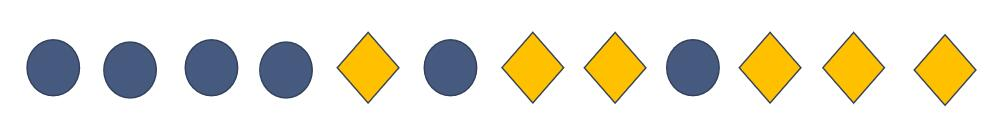

现在需要训练一个模型对数据进行分类，假如该模型非常简单，就是在数据上画一条线作为分类边界。模型认为边界的左边是Negtive，右边是Positive。如果该模型的分类边界向左或者向右移动的话，模型所对应的精准率和召回率如下图所示：

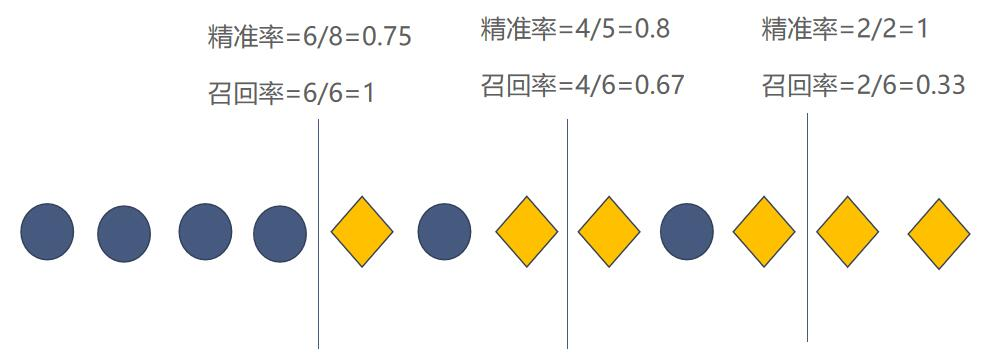

从上图可知，模型的精准率变高，召回率会变低，精准率变低，召回率会变高。

#### 应该选精准率还是召回率作为性能指标？

到底应该使用精准率还是召回率作为性能指标，其实是**根据具体业务来决定**的。

比如我现在想要训练一个模型来预测我关心的股票是涨(Positive)还是跌(Negtive)，那么我们应该主要使用**精准率**作为性能指标。因为精准率高的话，则模型预测该股票要涨的可信度就高（很有可能赚钱！）。

比如现在需要训练一个模型来预测人是(Positive)否(Negtive)患有艾滋病，那么我们应该主要使用**召回率**作为性能指标。因为召回率太低的话，很有可能存在漏网之鱼（可能一个人本身患有艾滋病，但预测成了健康），这样就很可能导致病人错过了最佳的治疗时间，这是非常致命的。

### 实操练习

#### 编程要求

根据提示，在`Begin-End`区域填写`python`代码，完成`precision_score`函数和`recall_score`函数分别实现计算**精准率**和**召回率**。

`precision_score`函数中的参数:

- `y_true`：数据的真实类别，类型为`ndarray`
- `y_pred`：模型预测的类别，类型为`ndarray`

`recall_score`函数中的参数:

- `y_true`：数据的真实类别，类型为`ndarray`
- `y_pred`：模型预测的类别，类型为`ndarray`

#### 测试说明

测试输入：
```
{
    'y_true': [1, 0, 0, 1, 0, 1, 0], 
    'y_pred': [0, 1, 0, 1, 0, 1, 0]
}
```

预期输出：`0.666667, 0.666667`

In [7]:
import numpy as np

# 计算精准率
def precision_score(y_true, y_predict):
    '''
    计算精准率并返回
    :param y_true: 真实类别，类型为ndarray
    :param y_predict: 预测类别，类型为ndarray
    :return: 精准率，类型为float
    '''
    #********* Begin *********#
    def TP(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 1))
    def FP(y_true, y_predict):
        return np.sum((y_true == 0) & (y_predict == 1))
    
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    #********* End *********#

# 计算召回率
def recall_score(y_true, y_predict):
    '''
    计算召回率并召回
    :param y_true: 真实类别，类型为ndarray
    :param y_predict: 预测类别，类型为ndarray
    :return: 召回率，类型为float
    '''
    #********* Begin *********#
    def FN(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 0))
    def TP(y_true, y_predict):
        return np.sum((y_true == 1) & (y_predict == 1))
    
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    #********* End *********#

In [8]:
# 测试代码
input_data = {
    'y_true': [1, 0, 0, 1, 0, 1, 0],
    'y_pred': [0, 1, 0, 1, 0, 1, 0]
}

print(
    precision_score(np.array(input_data['y_true']),np.array(input_data['y_pred'])),
    recall_score(np.array(input_data['y_true']), np.array(input_data['y_pred']))
)

0.6666666666666666 0.6666666666666666


## 8. F1 Score

### 任务描述

填写`Begin-End`之间的`python`代码，完成`f1_score`函数实现计算 **F1 Score**。

### 相关知识

为了完成本任务，需要掌握：**F1 Score**。

#### F1 Score

上一关中提到了精准率变高，召回率会变低，精准率变低，召回率会变高。那如果想要同时兼顾精准率和召回率，这个时候就可以使用**F1 Score**来作为性能度量指标了。

**F1 Score**是统计学中用来衡量二分类模型精确度的一种指标。它同时**兼顾**了分类模型的**精准率**和**召回率**。 **F1 Score**可以看作是模型**精准率**和**召回率**的一种**加权平均**，它的**最大值是1**，**最小值是0**。其公式如下：

$$
F1 = \frac{2 * precision * recall}{precision + recall}
$$

- 假设模型A的精准率为0.2，召回率为0.7，那么模型A的F1 Score为0.31111
- 假设模型B的精准率为0.7，召回率为0.2，那么模型B的F1 Score为0.31111
- 假设模型C的精准率为0.8，召回率为0.7，那么模型C的F1 Score为0.74667
- 假设模型D的精准率为0.2，召回率为0.3，那么模型D的F1 Score为0.24

从上述4个模型的各种性能可以看出，模型C的精准率和召回率都比较高，因此它的F1 Score也比较高。而其他模型的精准率和召回率要么都比较低，要么一个低一个高，所以它们的F1 Score比较低。

这也说明了只有当模型的精准率和召回率都比较高时F1 Score才会比较高。这也是F1 Score能够同时兼顾精准率和召回率的原因。

### 实操练习

#### 编程要求

根据提示，在`Begin-End`区域填写`python`代码，完成`f1_score`函数实现计算F1 Score。

`f1_score`函数中的参数:

- `precision`：模型的**精准率**，类型为`float`
- `recall`：模型的**召回率**，类型为`float`

#### 测试说明

测试输入：`[0.7, 0.2]`

预期输出：`0.311111`

In [9]:
import numpy as np

def f1_score(precision, recall):
    '''
    根据精准率和召回率计算F1 Score
    :param precision: 模型的精准率，类型为float
    :param recall: 模型的召回率，类型为float
    :return: 模型的f1 score，类型为float
    '''
    #********* Begin *********#
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0
    #********* End ***********#

In [12]:
# 测试代码
input_data = [0.7, 0.2]
f1_score(*input_data)

0.3111111111111111

## 9. ROC曲线与AUC

### 任务描述

填写python代码，完成`AUC`函数实现计算**AUC**。

### 相关知识

为了完成本任务，需要掌握：

- ROC曲线；
- AUC

#### ROC曲线

**ROC曲线**(Receiver Operating Characteristic Curve, 受试者操作特征曲线)描述的**TPR**（True Positive Rate ）与**FPR**（False Positive Rate）之间**关系的曲线**。

**TPR**与**FPR**的计算公式如下：

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

其中**TPR**的计算公式就是**召回率**的计算公式。也就是说**TPR就是召回率**。所以**TPR描述**的是模型**预测Positive**并且**预测正确的数量占真实类别为Positive样本的比例**。而**FPR描述**的模型**预测Positive**并且**预测错了的数量占真实类别为Negtive样本的比例**。

和精准率与召回率一样， TPR与FPR之间也存在关系。假设有这么一组数据，菱形代表Positive，圆形代表 Negtive。

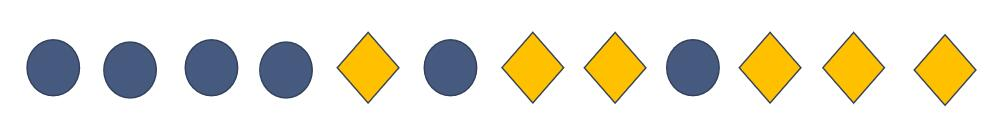

现在需要训练一个逻辑回归的模型对数据进行分类，假如将从0到1中的一些值作为模型的分类阈值。若模型认为当前数据是Positive的概率小于分类阈值则分类为Negtive，否则就分类为Positive（假设分类阈值为 0.8，模型认为这条数据是 Positive 的概率为 0.7， 0.7小于0.8，那么模型就认为这条数据是Negtive）。在不同的分类阈值下，模型所对应的TPR与FPR 如下图所示（竖线代表分类阈值，模型会将竖线左边的数据分类成Negtive，竖线右边的分类成Positive）：

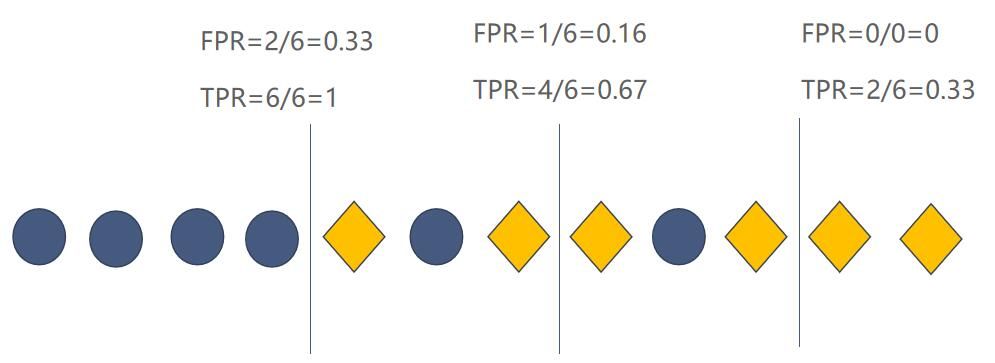

从图中可以看出，当模型的**TPR越高FPR也会越高**， **TPR越低FPR也会越低**。这与精准率和召回率之间的关系刚好相反。并且，模型的分类阈值一但改变，就有一组对应的TPR与FPR 。假设该模型在不同的分类阈值下其对应的TPR与FPR如下表所示：

| TPR  | FPR  |
|:--   |:--   |
| 0.20 | 0.08 |
| 0.35 | 0.10 |
| 0.37 | 0.11 |
| 0.51 | 0.12 |
| 0.53 | 0.13 |
| 0.56 | 0.14 |
| 0.71 | 0.21 |
| 0.82 | 0.26 |
| 0.92 | 0.41 |
| 0.93 | 0.42 |

若将**FPR**作为**横轴**， **TPR**作为**纵轴**，将上面的表格**以折线图**的形式画出来就是**ROC曲线**。

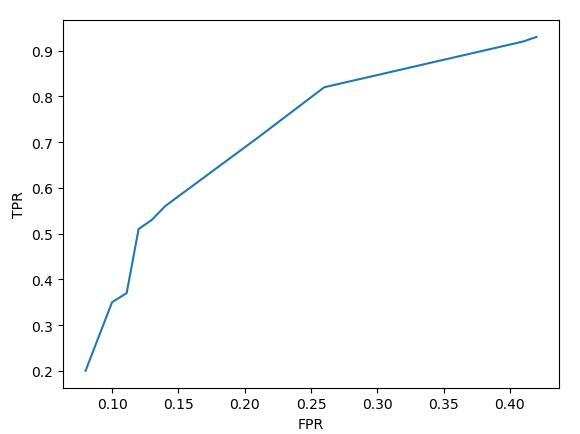

假设现在有模型A和模型B ，它们的**ROC曲线**如下图所示(其中模型A的ROC曲线为黄色，模型B的ROC曲线 为蓝色)：

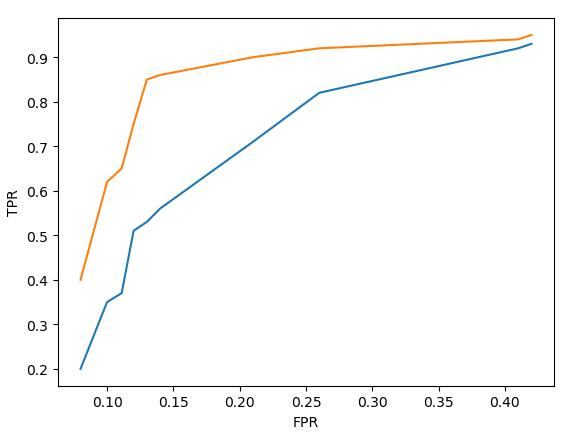

那么模型A的性能比模型B的性能好，因为模型A当FPR较低时所对应的TPR比模型B的低FPR所对应的TPR更高。由由于随着FPR的增大， TPR也会增大。所以**ROC曲线与横轴所围成的面积越大**，模型的分类**性能就越高**。而**ROC曲线的面积**称为**AUC**。

#### AUC

**AUC**（Area Under Curve）即曲线下面积。很明显模型的**AUC越高**，模型的**二分类性能就越强**。AUC的计算公式如下：

$$
AUC = \frac{\sum_{i \in positiveclass} rank_i - \frac{M(M+1)}{2}}{M \times N}
$$

其中**M**为**真实类别**为**Positive**的**样本数量**，**N**为**真实类别**为**Negtive**的**样本数量**。$rank_i$代表了**真实类别为Positive的样本点**的**预测概率**从小到大排序后，该预测概率排在第几。

举个例子，现有**预测概率**与**真实类别**的表格如下所示（其中0表示Negtive，1表示Positive）：

| 编号 | 预测概率 | 真实类别 |
|:--  |:-- |:-- |
| 1 | 0.1 | 0 |
| 2 | 0.4 | 0 |
| 3 | 0.3 | 1 |
| 4 | 0.8 | 1 |

想要得到公式中的rank，就需要将**预测概率从小到大排序**，排序后如下：

| 编号 | 预测概率 | 真实类别 |
|:--  |:-- |:-- |
| 1 | 0.1 | 0 |
| 3 | 0.3 | 1 |
| 2 | 0.4 | 0 |
| 4 | 0.8 | 1 |

排序后的表格中，真实类别为Positive只有编号为3和编号为4的数据，并且编号为3的数据排在第2 ，编号为4的数据排在第4。所以rank=`[2, 4]`。又因表格中真是类别为Positive的数据有2条， Negtive的数据有2条。因此M为2，N为2。所以根据AUC的计算公式可知：

$$
AUC = \frac{(2 + 4) - \frac{ 2(2+1)}{ 2 }}{2 \times 2} = 0.75
$$

### 实操练习

#### 编程要求

根据提示，在`Begin-End`区域填写`python`代码，完成`cal_AUC`函数实现计算AUC并返回结果。

`calAUC`函数中的参数:

- `prob`：模型预测样本为`Positive`的概率列表，类型为`ndarray`
- `labels`：样本的真实类别列表，其中`1`表示`Positive`，`0`表示`Negtive`，类型为`ndarray`

#### 测试说明

测试输入：`{'probs':[0.1, 0.4, 0.3, 0.8], 'labels':[0, 0, 1, 1]}`

预期输出：`0.75` 

In [16]:
import numpy as np

def cal_AUC(prob, labels):
    '''
    计算AUC并返回
    :param prob: 模型预测样本为Positive的概率列表，类型为ndarray
    :param labels: 样本的真实类别列表，其中1表示Positive，0表示Negtive，类型为ndarray
    :return: AUC，类型为float
    '''
    #********* Begin *********#
    f = list(zip(prob, labels))
    # 按概率从小到大排序
    sorted_labels_by_probs = [values2 for values1, values2 in sorted(f, key=lambda x:x[0])]
    # 得到rank
    ranks = [i + 1 for i in range(len(sorted_labels_by_probs)) if sorted_labels_by_probs[i] == 1]
    pos_num = 0
    neg_num = 0
    for i in range(len(labels)):
        if(labels[i] == 1):
            pos_num += 1
        else:
            neg_num += 1
    # 根据公式计算AUC
    auc = (sum(ranks) - (pos_num * (pos_num + 1)) / 2) / (pos_num * neg_num)
    return auc
    #********* End *********#

In [17]:
# 测试代码
input_data = {'probs':[0.1, 0.4, 0.3, 0.8], 'labels':[0, 0, 1, 1]}

cal_AUC(np.array(input_data['probs']), np.array(input_data['labels']))

0.75

## 10. sklearn中的分类性能指标

### 任务描述

使用 sklearn 完成对模型分类性能的评估。

### 相关知识

为了完成本任务，需要掌握如何使用`sklearn`提供的以下接口。

- accuracy_score：准确率（正确率）
- precision_score：精准率（查准率）
- recall_score：召回率（查全率）
- f1_score：F1分数
- roc_auc_score：ROC-AUC分数

#### accuracy_score

`sklearn`提供了计算准确率的接口`accuracy_score`。其中参数如下：

- `y_true`：为样本真实标签，类型为一维的`ndarray`或者`list`
- `y_pred`：为模型预测标签，类型为一维的`ndarray`或者`list`

导入代码如下：

In [18]:
from sklearn.metrics import accuracy_score

#### precision_score

`sklearn`提供了计算精准率的接口`precision_score`。其中参数如下：

- `y_true`：为样本真实标签，类型为一维的`ndarray`或者`list`
- `y_pred`：为模型预测标签，类型为一维的`ndarray`或者`list`
- `pos_label`：用什么值表示`Positive`，默认为1

导入代码如下：

In [19]:
from sklearn.metrics import precision_score

#### recall_score
 
`sklearn`提供了计算召回率的接口`recall_score`。其中参数如下：

- `y_true`：为样本真实标签，类型为一维的`ndarray`或者`list`
- `y_pred`：为模型预测标签，类型为一维的`ndarray`或者`list`
- `pos_label`：用什么值表示`Positive`，默认为1

导入代码如下：

In [20]:
from sklearn.metrics import recall_score

#### f1_score
 
`sklearn`提供了计算F1 Score的接口`f1_score`。其中参数如下：

- `y_true`：为样本真实标签，类型为一维的`ndarray`或者`list`
- `y_pred`：为模型预测标签，类型为一维的`ndarray`或者`list`
- `pos_label`：用什么值表示`Positive`，默认为 1

导入代码如下

In [21]:
from sklearn.metrics import f1_score

#### roc_auc_score
 
`sklearn`提供了计算AUC的接口`roc_auc_score `。其中参数如下：

- `y_true`：为样本真实标签，类型为一维的`ndarray`或者`list`
- `y_score`：为模型预测样本为`Positive`的概率，类型为一维的`ndarray`或者`list`

导入代码如下：

In [22]:
from sklearn.metrics import roc_auc_score

### 实操练习

#### 编程要求

在`Begin-End`区域填写`classification_performance(y_true, y_pred, y_prob)`函数分别计算模型的准确度、精准率、召回率、F1-Score 和AUC并将其返回，其中：

- `y_true`：样本的真实类别，类型为`ndarray`
- `y_pred`：模型预测出的类别，类型为`ndarray`
- `y_prob`：模型预测样本为`Positive`的概率，类型为`ndarray`

#### 测试说明

测试输入：
 ```
 {
     'y_prob':[0.7, 0.2, 0.9, 0.8],
     'y_true':[0, 0, 1, 1],
     'y_pred':[1, 0, 1, 1]
 }
 ```

预期输出：`0.750000, 0.666667, 1.000000, 0.800000, 1.000000` 

In [24]:
def classification_performance(y_true, y_pred, y_prob):
    '''
    返回准确度、精准率、召回率、f1 Score和AUC
    :param y_true:样本的真实类别，类型为`ndarray`
    :param y_pred:模型预测出的类别，类型为`ndarray`
    :param y_prob:模型预测样本为`Positive`的概率，类型为`ndarray`
    :return:
    '''
    #********* Begin *********#
    return (
        accuracy_score(y_true, y_pred), 
        precision_score(y_true, y_pred), 
        recall_score(y_true, y_pred), 
        f1_score(y_true, y_pred),
        roc_auc_score(y_true, y_prob)
    )
    #********* End *********#

In [27]:
# 测试代码
input_data = {
     'y_prob':[0.7, 0.2, 0.9, 0.8],
     'y_true':[0, 0, 1, 1],
     'y_pred':[1, 0, 1, 1]
}

classification_performance(**input_data)

(0.75, 0.6666666666666666, 1.0, 0.8, 1.0)